In [12]:
import os
import numpy as np

x_train = []
y_train = []

x_test = []
y_test = []

PATH = '/content/drive/My Drive/Test/'

for i in range(1, 8):
    for j in range(1, 17):
        f = open(PATH + str(i) + '/' + str(j) + '.csv', 'r')
        line = f.readline()
        while True:
            line = f.readline()
            if not line: break
            arr = line.split(',')
            x_train.append(arr[1:7])
            y_train.append(i - 1)

    for j in range(16, 21):
        f = open(PATH + str(i) + '/' + str(j) + '.csv', 'r')
        line = f.readline()
        while True:
            line = f.readline()
            if not line: break
            arr = line.split(',')
            x_test.append(arr[1:7])
            y_test.append(i - 1)


x_train = np.array(x_train).astype(np.float)
y_train = np.array(y_train).astype(np.int)
print(x_train)
print(y_train)
print(x_train.shape, y_train.shape)

x_test = np.array(x_test).astype(np.float)
y_test = np.array(y_test).astype(np.int)
print(x_test)
print(y_test)
print(x_test.shape, y_test.shape)

[[-0.0000e+00  2.8000e-05  4.6430e-03 -7.0000e+00  0.0000e+00  5.8000e+01]
 [ 0.0000e+00 -6.8000e-05 -1.5556e-02 -7.0000e+00  0.0000e+00  5.8000e+01]
 [ 0.0000e+00 -8.8000e-05 -1.7743e-02 -7.0000e+00  0.0000e+00  5.8000e+01]
 ...
 [-0.0000e+00 -4.7000e-05  1.4516e-02  5.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  3.9000e-05 -1.0158e-02  5.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  7.6000e-05 -2.0898e-02  5.0000e+00  0.0000e+00  0.0000e+00]]
[0 0 0 ... 6 6 6]
(6975823, 6) (6975823,)
[[ 2.00000e+00  1.01500e-03 -1.92428e-01  3.00000e+00  0.00000e+00
   0.00000e+00]
 [ 2.00000e+00  7.85000e-04 -1.86967e-01  3.00000e+00  0.00000e+00
   0.00000e+00]
 [ 2.00000e+00  6.79000e-04 -1.86953e-01  3.00000e+00  0.00000e+00
   0.00000e+00]
 ...
 [ 0.00000e+00  1.60000e-05 -1.14500e-03  2.00000e+01  0.00000e+00
   0.00000e+00]
 [ 0.00000e+00  2.10000e-05 -1.19700e-03  2.00000e+01  0.00000e+00
   0.00000e+00]
 [ 0.00000e+00  1.80000e-05 -1.11000e-03  2.00000e+01  0.00000e+00
   0.00000e+00]

In [13]:
norm = x_train.max(axis=0)
print(norm)
print('')

x_train = x_train / norm
x_test = x_test / norm


print(x_train)
print(y_train)
print('')

print(x_train.min(axis=0))
print(x_train.max(axis=0))
print('')
print(x_test.min(axis=0))
print(x_test.max(axis=0))
print('')

[193.        74.684303 215.808624 450.       100.       100.      ]

[[-0.00000000e+00  3.74911446e-07  2.15144322e-05 -1.55555556e-02
   0.00000000e+00  5.80000000e-01]
 [ 0.00000000e+00 -9.10499225e-07 -7.20823835e-05 -1.55555556e-02
   0.00000000e+00  5.80000000e-01]
 [ 0.00000000e+00 -1.17829311e-06 -8.22163622e-05 -1.55555556e-02
   0.00000000e+00  5.80000000e-01]
 ...
 [-0.00000000e+00 -6.29315641e-07  6.72632990e-05  1.11111111e-02
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.22198085e-07 -4.70694813e-05  1.11111111e-02
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.01761678e-06 -9.68357965e-05  1.11111111e-02
   0.00000000e+00  0.00000000e+00]]
[0 0 0 ... 6 6 6]

[-0.19689119 -1.74698165 -0.26060571 -1.          0.          0.        ]
[1. 1. 1. 1. 1. 1.]

[-0.18134715 -0.49606764 -0.05715404 -1.          0.          0.        ]
[0.75129534 0.50436066 0.75397296 1.         1.         1.        ]



In [14]:
FRAME = 1800
STRIDE = 90

x_train_seg = []
y_train_seg = []
for i in range(FRAME, x_train.shape[0] + 1, STRIDE):    
    x_train_seg.append(x_train[i-FRAME:i, :])
    y_train_seg.append(y_train[i - 1])

x_train_seg = np.array(x_train_seg)
x_train_seg = x_train_seg[:, :, :, np.newaxis]
y_train_seg = np.array(y_train_seg)

print(x_train_seg.shape, y_train_seg.shape, np.bincount(y_train_seg))

x_test_seg = []
y_test_seg = []
for i in range(FRAME, x_test.shape[0] + 1, STRIDE):    
    x_test_seg.append(x_test[i-FRAME:i, :])
    y_test_seg.append(y_test[i - 1])

x_test_seg = np.array(x_test_seg)
x_test_seg = x_test_seg[:, :, :, np.newaxis]
y_test_seg = np.array(y_test_seg)

print(x_test_seg.shape, y_test_seg.shape, np.bincount(y_test_seg))

(77490, 1800, 6, 1) (77490,) [ 9825 12675 11125 10506 12667 10505 10187]
(24359, 1800, 6, 1) (24359,) [3515 3832 3459 3097 3666 3351 3439]


In [15]:
ran_idx = np.random.choice(x_train_seg.shape[0], x_train_seg.shape[0])
x_train_seg = x_train_seg[ran_idx]
y_train_seg = y_train_seg[ran_idx]

ran_idx = np.random.choice(x_test_seg.shape[0], x_test_seg.shape[0])
x_test_seg = x_test_seg[ran_idx]
y_test_seg = y_test_seg[ran_idx]

In [16]:
print(x_train_seg.shape, y_train_seg.shape, np.bincount(y_train_seg))
print(x_test_seg.shape, y_test_seg.shape, np.bincount(y_test_seg))

(77490, 1800, 6, 1) (77490,) [ 9848 12676 11007 10643 12541 10677 10098]
(24359, 1800, 6, 1) (24359,) [3590 3827 3328 3132 3714 3365 3403]


In [17]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, 3, padding='same', activation='relu', input_shape=(1800, 6, 1)),
    tf.keras.layers.Conv2D(16, 3, (2, 1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, 3, (2, 1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, (2, 1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, 3, (2, 1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, 3, (2, 1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, 3, (2, 1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(1024, 3, (2, 1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(1024, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(2048, 3, (2, 1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(2048, 3, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(7)
])

model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 1800, 6, 8)        80        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 900, 6, 16)        1168      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 900, 6, 16)        2320      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 450, 6, 32)        4640      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 450, 6, 32)        9248      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 225, 6, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 225, 6, 64)       

In [18]:
history = model.fit(x_train_seg, y_train_seg, batch_size=64, epochs=10, validation_data=(x_test_seg, y_test_seg), ca)

Epoch 1/10
1211/1211 [==============================] - 379s 313ms/step - loss: 1.9333 - accuracy: 0.1719 - val_loss: 1.8587 - val_accuracy: 0.1856
Epoch 2/10
1211/1211 [==============================] - 377s 311ms/step - loss: 1.5774 - accuracy: 0.3843 - val_loss: 1.6024 - val_accuracy: 0.3809
Epoch 3/10
1211/1211 [==============================] - 377s 311ms/step - loss: 1.2775 - accuracy: 0.5087 - val_loss: 1.5003 - val_accuracy: 0.4556
Epoch 4/10
1211/1211 [==============================] - 377s 311ms/step - loss: 1.0289 - accuracy: 0.6097 - val_loss: 1.2629 - val_accuracy: 0.5551
Epoch 5/10
1211/1211 [==============================] - 376s 311ms/step - loss: 0.7954 - accuracy: 0.7030 - val_loss: 1.1716 - val_accuracy: 0.6064
Epoch 6/10
1211/1211 [==============================] - 376s 311ms/step - loss: 0.5562 - accuracy: 0.7956 - val_loss: 1.4702 - val_accuracy: 0.6140
Epoch 7/10
1211/1211 [==============================] - 376s 311ms/step - loss: 0.3209 - accuracy: 0.8853 - val_

In [19]:
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics =  ['loss', 'accuracy']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()


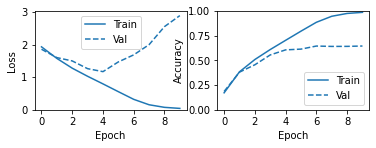

In [20]:
plot_metrics(history)

In [21]:
pred = model.predict(x_test_seg)

print(pred)

[[-17.067108    15.062517     0.17136179 ...  -4.98097    -17.214228
  -18.61705   ]
 [  1.9880402    2.7412195   -7.958185   ... -10.687461    -0.73715174
   -1.7104493 ]
 [ -5.4324846  -16.63941      1.4745485  ...  -8.455798    -2.8962185
    3.1091244 ]
 ...
 [ -5.6015253  -21.595152    12.3726015  ...  -5.593635    -7.740184
   -6.9258137 ]
 [ -1.5135791    8.77465    -12.6573715  ... -12.668591   -22.396646
    9.105352  ]
 [  1.8391478   29.424026    -5.0475388  ... -25.400791   -35.621796
   -8.428171  ]]


In [22]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test_seg, pred.argmax(axis=1))
print(matrix)
print(np.bincount(y_test_seg)[:, np.newaxis])
print((matrix / np.bincount(y_test_seg)[:, np.newaxis] * 100).astype(np.int))

[[1352  886  645  461   16  183   47]
 [  28 3661   76   33   21    4    4]
 [  83  118 2326  216   52  486   47]
 [ 217   85  412 1970   26  252  170]
 [  25   88  263   27 2936  135  240]
 [  93   57  539  145   96 2248  187]
 [ 642  750  285  316   25  160 1225]]
[[3590]
 [3827]
 [3328]
 [3132]
 [3714]
 [3365]
 [3403]]
[[37 24 17 12  0  5  1]
 [ 0 95  1  0  0  0  0]
 [ 2  3 69  6  1 14  1]
 [ 6  2 13 62  0  8  5]
 [ 0  2  7  0 79  3  6]
 [ 2  1 16  4  2 66  5]
 [18 22  8  9  0  4 35]]
